In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import multiprocessing  
from multiprocessing import Pool
import Classification_Function
import Feature_Creation
from Feature_Creation import create_features
import json
import warnings
warnings.filterwarnings('ignore')

In [39]:
def ETF_stats(etf,instances = 60):
    fname = os.path.join(os.path.abspath(os.getcwd()),'data','10_ETF',etf+'.csv')
    start = datetime.datetime.now()
    print(start,etf)
    if __name__ == '__main__':
        pool = Pool()
        filename = []
        for i in range(0,instances):
            filename.append([fname,i])
        results = pool.starmap(Classification_Function.daily_prediction_analysis, filename)
    #    for value, factors in zip(filename, results):
    #        print("The factors of {} are {}".format(value, factors))
    RF_list= []
    Log_list = []
    SVM_list = []
    XGB_list = []
    stack_list = []
    for i in range(len(results)):
        RF_list.append(results[i][1]['information gain'])
        Log_list.append(results[i][2]['information gain'])
        SVM_list.append(results[i][3]['information gain'])
        XGB_list.append(results[i][4]['information gain'])
        stack_list.append(results[i][5]['information gain'])
    data = {'RF': RF_list, 'Log': Log_list,'SVM': SVM_list,'XGB': XGB_list,'stack': stack_list}
    df= pd.DataFrame.from_dict(data)
    df.to_csv(etf+'_data.csv')
    with open(etf, 'w') as fout:
        json.dump(results, fout)
    #data = {'RF': RF_list_random1, 'Log': Log_list_random1,'SVM': SVM_list_random1,'XGB': XGB_list_random1,'stack': stack_list_random1}
    #df_random1 = pd.DataFrame.from_dict(data)
    #df_random1.to_csv('random1_data.csv')
    end = datetime.datetime.now()
    print(end-start)

In [17]:
ETF_stats('SPY')

1:30:21.616919


In [26]:
ETF_stats('random2')

1:33:49.368878


In [29]:
ETF_stats('OIH')

1:35:05.750995


In [33]:
ETF_stats('random3')

1:27:48.060003


In [34]:
ETF_stats('GLD')

1:29:16.950972


In [44]:
ETF_stats('random5')

2021-01-15 12:42:32.723491 random5
2:09:11.076418


In [41]:
ETF_stats('TIP')

2021-01-15 11:07:06.016116 TIP
1:34:05.226754


In [48]:
ETF_stats('TLT')

2021-01-15 15:18:12.915961 TLT
1:38:54.093290


In [51]:
ETF_stats('FXE')

2021-01-15 17:15:03.239764 FXE
1:30:16.746915


In [52]:
ETF_stats('EEM')

2021-01-15 18:45:20.102518 EEM
1:30:07.625906


In [57]:
ETF_stats('IWM')

2021-01-15 21:16:35.788090 IWM
1:29:02.642012


In [63]:
ETF_stats('LQD')

2021-01-16 16:21:49.171709 LQD
1:28:45.933660


In [59]:
df = pd.read_csv('IYR_data.csv')

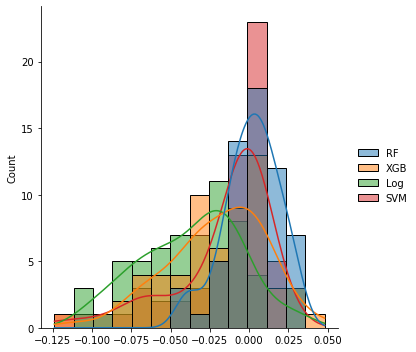

In [62]:
sns.displot([df['RF'],df['XGB'],df['Log'],df['SVM']],kde=True)